In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
ls

MyDrive/  Shareddrives/


In [ ]:
fake_news_data = pd.read_csv('/content/drive/MyDrive/fake_news_NLP_Project/train.csv')

In [ ]:
fake_news_data.dropna(inplace=True)

Code for word cloud

In [ ]:
def make_word_cloud(df, stopwords,titlee):
  df = list(df)

  cnt = {}
  for j in df:
    words = j.split(' ')
    for w in words:
      if(w not in cnt): cnt[w] = 1
      else: cnt[w]+=1
  
  cnt = dict(sorted(cnt.items(), key=lambda item: -item[1]))
  it = 1

  for i in cnt:
    if(it > 250): stopwords.add(i)
    it+=1

  print(cnt)
  curr = ""
  temp = []
  print(df)
  for j in df:
    s = j.split(' ')
    add = []
    # print(type(s),s)
    for k in s:
      if(len(k) < 4 or k in stopwords): continue
      add.append(k)
    s = ' '.join(str(i) for i in add)
    if(len(s) > 3): temp.append(s)

  print(temp)
  curr = ' '.join(i for i in temp)
  print(curr)
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                # stopwords = stopwords,
                min_font_size = 10).generate(curr)
 
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(titlee)
  plt.show()
  


{'The': 1410, 'the': 1312, 'to': 1281, 'of': 1074, 'Trump': 861, 'in': 780, 'To': 751, 'on': 749, 'Hillary': 695, 'and': 691, 'Clinton': 603, 'a': 574, 'for': 560, 'In': 494, 'by': 485, 'Is': 471, '–': 451, 'A': 449, 'Of': 427, 'For': 398, 'is': 370, 'Comment': 325, 'New': 303, 'And': 285, 'Election': 260, 'On': 252, 'FBI': 251, '': 248, 'US': 242, 'What': 236, 'Will': 234, 'Are': 233, 'With': 225, '&': 220, 'That': 207, 'How': 206, 'with': 206, 'War': 204, 'This': 203, 'Donald': 202, 'Why': 187, 'About': 185, 'You': 184, 'World': 183, 'at': 177, 'From': 172, 'Just': 172, '|': 171, 'After': 168, 'from': 164, 'Obama': 160, 'as': 148, 'It': 146, 'Russia': 136, '-': 136, 'Be': 136, 'Your': 135, 'At': 133, 'Not': 132, 'As': 130, 'Has': 128, 'U.S.': 120, 'Trump’s': 120, 'Re:': 116, 'are': 116, ':': 113, 'de': 113, 'America': 110, 'Her': 109, 'Over': 108, 'More': 107, '(VIDEO)': 106, 'Campaign': 105, 'Emails': 105, 'Have': 103, 'Police': 103, 'Out': 102, 'Who': 101, 'His': 101, '3': 101, 'Hi

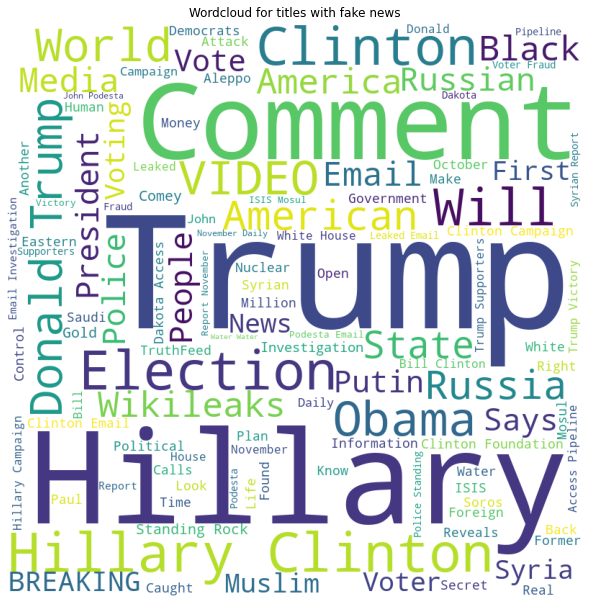

In [ ]:
cache = set(stopwords.words("english"))
df=fake_news_data

make_word_cloud(df[df['label']==1]['title'],cache,'Wordcloud for titles with fake news')

{'-': 8639, 'New': 6653, 'The': 6588, 'York': 6301, 'Times': 6248, 'to': 2760, 'Breitbart': 2394, 'in': 1938, 'of': 1861, 'the': 1565, 'Trump': 1462, 'a': 1366, 'and': 1152, 'for': 1146, 'on': 1037, 'Is': 760, 'at': 619, 'Donald': 618, 'With': 461, 'as': 408, 'Trump’s': 403, 'After': 362, 'U.S.': 362, 'by': 352, 'Your': 332, 'A': 316, 'From': 277, 'Not': 268, 'Says': 258, 'How': 253, 'Over': 244, 'Are': 236, 'Will': 236, 'Be': 236, 'In': 234, 'His': 225, 'Briefing': 209, 'Obama': 207, 'It': 207, 'with': 204, 'Hillary': 203, 'House': 196, 'State': 193, 'Trump,': 182, 'That': 179, 'Who': 176, 'Clinton': 175, 'Have': 174, 'President': 169, 'What': 167, 'an': 166, 'About': 165, 'White': 163, 'You': 161, 'Up': 155, 'Bill': 152, 'from': 151, 'Evening': 149, 'Police': 149, 'More': 148, 'Was': 142, 'Against': 141, 'but': 136, 'Has': 136, 'News': 133, 'No': 133, 'First': 132, 'Out': 131, 'Attack': 129, 'Russia': 126, 'May': 126, 'Border': 122, 'Media': 122, 'He': 121, 'Dies': 120, 'Health': 116

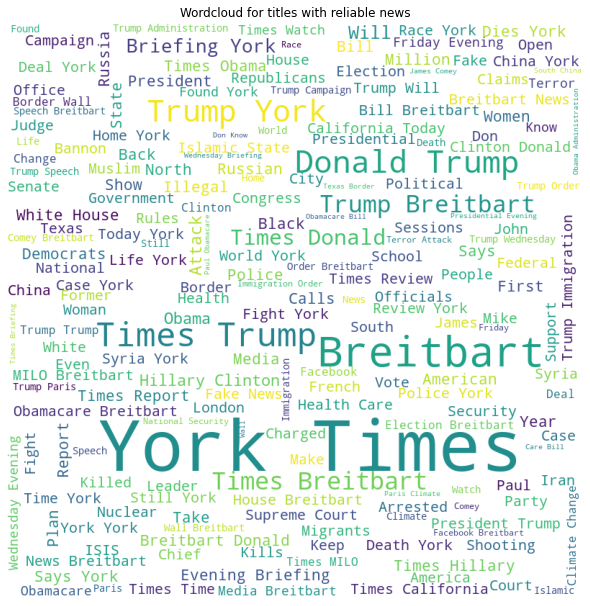

In [ ]:
cache = set(stopwords.words("english"))
df=fake_news_data

make_word_cloud(df[df['label']==0]['title'],cache,'Wordcloud for titles with reliable news')

In [ ]:
from nltk.stem.porter import PorterStemmer
import re
cache = set(stopwords.words("english"))
def pre_processing(msg) :
  corpus_test = []
  for i in range(len(msg)):
    review = re.sub('[^a-zA-Z]',' ',msg[i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in cache]
    review = ' '.join(review)
    corpus_test.append(review)

  return corpus_test

In [ ]:
fake_news_data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


Checking if data is balanced

10413
10387


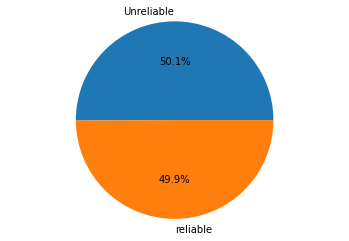

In [ ]:
labels = 'Unreliable', 'reliable'
ones=sum(fake_news_data['label']==1)
zeros=len(fake_news_data)-ones

print(ones)
print(zeros)
plt.pie([ones,zeros], labels=labels,  autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Fake label counts wrt higher publication authors

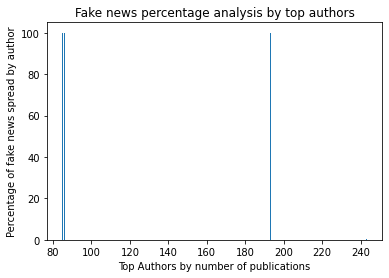

In [ ]:
author_counts=dict(fake_news_data['author'].value_counts())

top_authors=sorted(author_counts, key=author_counts.get, reverse=True)[:20]
num_published=[]
percentages=[]
for i in top_authors:
  vari=fake_news_data['label'][fake_news_data['author']==i]
  num_published.append(len(vari))
  percentages.append(100*sum(vari==1)/len(vari))


plt.bar(num_published, percentages ,width = 0.4)

plt.xlabel("Top Authors by number of publications")
plt.ylabel("Percentage of fake news spread by author")
plt.title("Fake news percentage analysis by top authors")
plt.show()

In [ ]:
print(author_counts)

{'Pam Key': 243, 'admin': 193, 'Jerome Hudson': 166, 'Charlie Spiering': 141, 'John Hayward': 140, 'Katherine Rodriguez': 124, 'Warner Todd Huston': 122, 'Ian Hanchett': 119, 'Breitbart News': 118, 'Daniel Nussbaum': 112, 'AWR Hawkins': 107, 'Jeff Poor': 107, 'Joel B. Pollak': 106, 'Trent Baker': 102, 'Breitbart London': 97, 'Bob Price': 93, 'Ben Kew': 90, 'Charlie Nash': 88, 'Pakalert': 86, 'Eddy Lavine': 85, 'Starkman': 84, 'Gillian': 82, 'Alex Ansary': 82, 'Editor': 81, 'Lucas Nolan': 80, 'noreply@blogger.com (Alexander Light)': 80, 'Dave Hodges': 77, 'Anonymous': 77, 'Breitbart Jerusalem': 75, 'John Binder': 75, 'IWB': 75, 'BareNakedIslam': 74, 'The European Union Times': 74, 'Activist Post': 72, 'EdJenner': 69, 'The Doc': 69, 'Penny Starr': 67, 'Henry Wolff': 67, 'Mac Slavo': 66, 'Iron Sheik': 66, 'Kaitlyn Stegall': 65, 'Tom Ciccotta': 64, 'noreply@blogger.com (Der Postillon)': 64, 'Jason Ditz': 64, 'Frances Martel': 64, 'Dr. Susan Berry': 63, 'Heather Callaghan': 62, 'Geoffrey Gr

In [ ]:
ranges=[2,6,40,243]
counts=[0,0,0,0]
percs=[0,0,0,0]

for i in author_counts.keys():
  vari=fake_news_data['label'][fake_news_data['author']==i]
  fakes=sum(vari==1)
  total=len(vari)
  perc=fakes/total

  if(total<=2):
    counts[0]+=1
    percs[0]+=perc

  elif(total>2 and total<=6):
    counts[1]+=1
    percs[1]+=perc

  elif(total>6 and total<=40):
    counts[2]+=1
    percs[2]+=perc
  
  else:
    counts[3]+=1
    percs[3]+=perc

for i in range(len(percs)):
  percs[i]=100*percs[i]/counts[i]

print(percs)

[47.44336569579288, 50.08423586040915, 40.42637975692369, 51.90394332447778]


Binning authors and publications

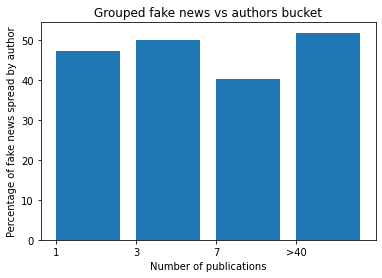

In [ ]:
names=['1','3','7','>40']
plt.bar(names, percs ,width = 0.8,align='edge')

plt.xlabel("Number of publications")
plt.ylabel("Percentage of fake news spread by author")
plt.title("Grouped fake news vs authors bucket")
plt.show()

In [ ]:
df=fake_news_data
df=df.drop('id',axis=1)

In [ ]:
df.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


Running models on single column

In [ ]:
only_title=df[['title','label']]

In [ ]:
only_title.head(10)

,title,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,0
8,Excerpts From a Draft Script for Donald Trump’...,0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",0


In [ ]:
only_title.isna().sum()

title    558
label      0
dtype: int64

In [ ]:
only_title=only_title.dropna()
only_title.reset_index(drop=True, inplace=True)
corpus_title=pre_processing(only_title['title'])

In [ ]:
only_title.isna().sum()

title    0
label    0
dtype: int64

In [ ]:
len(corpus_title)

20242

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

tf_data = tfidf.fit_transform(corpus_title)
cv_data = cvectorizer.fit_transform(corpus_title)

In [ ]:
cv_acc=[]
tf_acc=[]
cv_model=[]
tf_model=[]
cv_confusion_matrix=[]
tf_confusion_matrix=[]

In [ ]:
y=only_title['label']

In [ ]:
def mymodel(s,cv,data,y,extra_name):
  x_train , x_test, y_train, y_test = train_test_split(data,y , test_size=0.2)
  clf=MultinomialNB()

  if(s=='naive-bayes'):
    clf=MultinomialNB()

  elif(s=='logistic'):
    clf = LogisticRegression(random_state=0)
  else:
    clf = DecisionTreeClassifier(random_state=0)

  clf.fit(x_train, y_train)
  pred = clf.predict(x_test)
  score = accuracy_score(y_test, pred)
  confusion=confusion_matrix(y_test,pred)

  if(cv==True):
    cv_acc.append(score)
    cv_model.append(s+extra_name)
    cv_confusion_matrix.append(confusion)

  else:
    tf_acc.append(score)
    tf_model.append(s+extra_name)
    tf_confusion_matrix.append(confusion)

In [ ]:
mymodel('naive-bayes',False,tf_data,y,' title only')
mymodel('logistic',False,tf_data,y,' title only')
mymodel('decision-tree',False,tf_data,y,' title only')

In [ ]:
tf_acc

[0.8730550753272412, 0.9350456902938997, 0.9170165472956285]

In [ ]:
mymodel('naive-bayes',True,cv_data,y,' title only')
mymodel('logistic',True,cv_data,y,' title only')
mymodel('decision-tree',True,cv_data,y,' title only')

In [ ]:
cv_acc

[0.8965176586811558, 0.9313410718695975, 0.925907631513954]

In [ ]:
only_author=df[['author','label']]
only_author.isna().sum()

author    1957
label        0
dtype: int64

In [ ]:
only_author.head(10)

,author,label
0,Darrell Lucus,1
1,Daniel J. Flynn,0
2,Consortiumnews.com,1
3,Jessica Purkiss,1
4,Howard Portnoy,1
5,Daniel Nussbaum,0
6,NaN,1
7,Alissa J. Rubin,0
8,NaN,0
9,Megan Twohey and Scott Shane,0


In [ ]:
only_author=only_author.dropna()
only_author.reset_index(drop=True, inplace=True)
corpus_author=pre_processing(only_author['author'])

only_author.isna().sum()

author    0
label     0
dtype: int64

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

tf_data = tfidf.fit_transform(corpus_author)
cv_data = cvectorizer.fit_transform(corpus_author)

In [ ]:
y=only_author['label']

mymodel('naive-bayes',False,tf_data,y,' author only')
mymodel('logistic',False,tf_data,y,' author only')
mymodel('decision-tree',False,tf_data,y,' author only')

mymodel('naive-bayes',True,cv_data,y,' author only')
mymodel('logistic',True,cv_data,y,' author only')
mymodel('decision-tree',True,cv_data,y,' author only')

In [ ]:
cv_acc

[0.8965176586811558,
 0.9313410718695975,
 0.925907631513954,
 0.9517113292650571,
 0.9533032634651101,
 0.9713451843990448]

In [ ]:
tf_acc

[0.8730550753272412,
 0.9350456902938997,
 0.9170165472956285,
 0.9328734412310958,
 0.9647121252321571,
 0.9676306712655877]

In [ ]:
only_text=df[['text','label']]
only_text.isna().sum()

text     39
label     0
dtype: int64

In [ ]:
only_text=only_text.dropna()
only_text.reset_index(drop=True, inplace=True)
corpus_text=pre_processing(only_text['text'])

only_text.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

tf_data = tfidf.fit_transform(corpus_text)
cv_data = cvectorizer.fit_transform(corpus_text)

In [ ]:
y=only_text['label']

mymodel('naive-bayes',False,tf_data,y,' text only')
mymodel('logistic',False,tf_data,y,' text only')
mymodel('decision-tree',False,tf_data,y,' text only')

mymodel('naive-bayes',True,cv_data,y,' text only')
mymodel('logistic',True,cv_data,y,' text only')
mymodel('decision-tree',True,cv_data,y,' text only')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cv_acc

[0.8965176586811558,
 0.9313410718695975,
 0.925907631513954,
 0.9517113292650571,
 0.9533032634651101,
 0.9713451843990448,
 0.8798458945340718,
 0.9436551890199856,
 0.8897182759450999]

In [ ]:
cv_model

['naive-bayes title only',
 'logistic title only',
 'decision-tree title only',
 'naive-bayes author only',
 'logistic author only',
 'decision-tree author only',
 'naive-bayes text only',
 'logistic text only',
 'decision-tree text only']

In [ ]:
for i in range(len(tf_model)):
  if('naive' in tf_model[i]):
    print(tf_model[i])
    print(tf_acc[i])

for i in range(len(tf_model)):
  if('logistic' in tf_model[i]):
    print(tf_model[i])
    print(tf_acc[i])

for i in range(len(tf_model)):
  if('tree' in tf_model[i]):
    print(tf_model[i])
    print(tf_acc[i])


naive-bayes title only
0.8730550753272412
naive-bayes author only
0.9328734412310958
naive-bayes text only
0.8938117023838189
logistic title only
0.9350456902938997
logistic author only
0.9647121252321571
logistic text only
0.9463038767156272
decision-tree title only
0.9170165472956285
decision-tree author only
0.9676306712655877
decision-tree text only
0.8952564411268962


In [ ]:
for i in range(len(tf_model)):
  if('naive' in tf_model[i]):
    print(tf_model[i])
    print(tf_acc[i])

naive-bayes title only
0.8752778463818227
naive-bayes author only
0.9326081188644203
naive-bayes text only
0.9070551408620274


Plotting the accuracy obtained

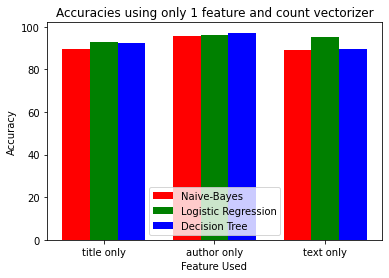

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [cv_acc[0], cv_acc[3], cv_acc[6]]
yvals = [cv_acc[1], cv_acc[4], cv_acc[7]]
zvals = [cv_acc[2], cv_acc[5], cv_acc[8]]

for i in range(len(xvals)):
  xvals[i]*=100

for i in range(len(yvals)):
  yvals[i]*=100

for i in range(len(zvals)):
  zvals[i]*=100

bar1 = plt.bar(ind, xvals, width, color = 'r')
bar2 = plt.bar(ind+width, yvals, width, color='g')
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Feature Used")
plt.ylabel('Accuracy')
plt.title("Accuracies using only 1 feature and count vectorizer")
  
plt.xticks(ind+width,['title only', 'author only', 'text only'])
plt.legend( (bar1, bar2, bar3), ('Naive-Bayes', 'Logistic Regression', 'Decision Tree') )
plt.show()

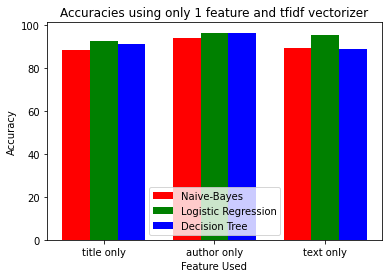

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [tf_acc[0], tf_acc[3], tf_acc[6]]
yvals = [tf_acc[1], tf_acc[4], tf_acc[7]]
zvals = [tf_acc[2], tf_acc[5], tf_acc[8]]

for i in range(len(xvals)):
  xvals[i]*=100

for i in range(len(yvals)):
  yvals[i]*=100

for i in range(len(zvals)):
  zvals[i]*=100

bar1 = plt.bar(ind, xvals, width, color = 'r')
bar2 = plt.bar(ind+width, yvals, width, color='g')
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Feature Used")
plt.ylabel('Accuracy')
plt.title("Accuracies using only 1 feature and tfidf vectorizer")
  
plt.xticks(ind+width,['title only', 'author only', 'text only'])
plt.legend( (bar1, bar2, bar3), ('Naive-Bayes', 'Logistic Regression', 'Decision Tree') )
plt.show()

Using two columns

In [ ]:
cv_acc=[]
tf_acc=[]
cv_model=[]
tf_model=[]
cv_confusion_matrix=[]
tf_confusion_matrix=[]

In [ ]:
vari_df=df[['text','author','label']]
vari_df['author'] = vari_df['author'].fillna(" ")
vari_df['text'] = vari_df['text'].fillna(" ")
vari_df['text author']=vari_df['text']+" "+vari_df['author']
vari_df=vari_df.drop(['text','author'],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
text_author=vari_df.dropna()
text_author.reset_index(drop=True, inplace=True)
corpus_text_author=pre_processing(text_author['text author'])

text_author.isna().sum()

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

tf_data = tfidf.fit_transform(corpus_text_author)
cv_data = cvectorizer.fit_transform(corpus_text_author)

y=text_author['label']

mymodel('naive-bayes',False,tf_data,y,' text and author')
mymodel('logistic',False,tf_data,y,' text and author')
mymodel('decision-tree',False,tf_data,y,' text and author')

mymodel('naive-bayes',True,cv_data,y,' text and author')
mymodel('logistic',True,cv_data,y,' text and author')
mymodel('decision-tree',True,cv_data,y,' text and author')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
cv_acc

[0.8923076923076924, 0.9564903846153846, 0.8918269230769231]

In [ ]:
vari_df=df[['title','author','label']]
vari_df['author'] = vari_df['author'].fillna(" ")
vari_df['title'] = vari_df['title'].fillna(" ")
vari_df['title author']=vari_df['title']+" "+vari_df['author']
vari_df=vari_df.drop(['title','author'],axis=1)

title_author=vari_df.dropna()
title_author.reset_index(drop=True, inplace=True)
corpus_title_author=pre_processing(title_author['title author'])

title_author.isna().sum()

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

tf_data = tfidf.fit_transform(corpus_title_author)
cv_data = cvectorizer.fit_transform(corpus_title_author)

y=title_author['label']

mymodel('naive-bayes',False,tf_data,y,' title and author')
mymodel('logistic',False,tf_data,y,' title and author')
mymodel('decision-tree',False,tf_data,y,' title and author')

mymodel('naive-bayes',True,cv_data,y,' title and author')
mymodel('logistic',True,cv_data,y,' title and author')
mymodel('decision-tree',True,cv_data,y,' title and author')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cv_acc

[0.8923076923076924,
 0.9564903846153846,
 0.8918269230769231,
 0.9644230769230769,
 0.9920673076923077,
 0.9925480769230769]

In [ ]:
vari_df=df[['title','text','label']]
vari_df['text'] = vari_df['text'].fillna(" ")
vari_df['title'] = vari_df['title'].fillna(" ")
vari_df['title text']=vari_df['title']+" "+vari_df['text']
vari_df=vari_df.drop(['title','text'],axis=1)

title_text=vari_df.dropna()
title_text.reset_index(drop=True, inplace=True)
corpus_title_text=pre_processing(title_text['title text'])

title_text.isna().sum()

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

tf_data = tfidf.fit_transform(corpus_title_text)
cv_data = cvectorizer.fit_transform(corpus_title_text)

y=title_text['label']

mymodel('naive-bayes',False,tf_data,y,' title and text')
mymodel('logistic',False,tf_data,y,' title and text')
mymodel('decision-tree',False,tf_data,y,' title and text')

mymodel('naive-bayes',True,cv_data,y,' title and text')
mymodel('logistic',True,cv_data,y,' title and text')
mymodel('decision-tree',True,cv_data,y,' title and text')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

In [ ]:
for i in range(len(tf_model)):
  if('naive' in tf_model[i]):
    print(tf_model[i])
    print(tf_acc[i])

for i in range(len(tf_model)):
  if('logistic' in tf_model[i]):
    print(tf_model[i])
    print(tf_acc[i])

for i in range(len(tf_model)):
  if('tree' in tf_model[i]):
    print(tf_model[i])
    print(tf_acc[i])



naive-bayes text and author
0.9045673076923076
naive-bayes title and author
0.9774038461538461
naive-bayes title and text
0.8975961538461539
logistic text and author
0.953125
logistic title and author
0.9944711538461538
logistic title and text
0.9603365384615384
decision-tree text and author
0.8918269230769231
decision-tree title and author
0.9930288461538461
decision-tree title and text
0.9346153846153846


In [ ]:
for i in range(len(tf_model)):
  if('naive' in cv_model[i]):
    print(cv_model[i])
    print(cv_acc[i])

for i in range(len(tf_model)):
  if('logistic' in cv_model[i]):
    print(cv_model[i])
    print(cv_acc[i])

for i in range(len(tf_model)):
  if('tree' in cv_model[i]):
    print(cv_model[i])
    print(cv_acc[i])



naive-bayes text and author
0.8923076923076924
naive-bayes title and author
0.9644230769230769
naive-bayes title and text
0.8983173076923077
logistic text and author
0.9564903846153846
logistic title and author
0.9920673076923077
logistic title and text
0.9586538461538462
decision-tree text and author
0.8918269230769231
decision-tree title and author
0.9925480769230769
decision-tree title and text
0.9310096153846154


Plotting obtained accuracy

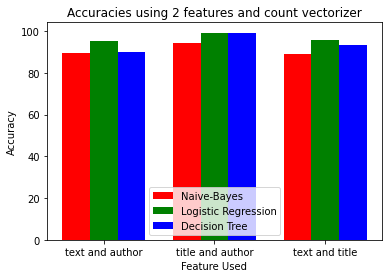

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [cv_acc[0], cv_acc[3], cv_acc[6]]
yvals = [cv_acc[1], cv_acc[4], cv_acc[7]]
zvals = [cv_acc[2], cv_acc[5], cv_acc[8]]

for i in range(len(xvals)):
  xvals[i]*=100

for i in range(len(yvals)):
  yvals[i]*=100

for i in range(len(zvals)):
  zvals[i]*=100

bar1 = plt.bar(ind, xvals, width, color = 'r')
bar2 = plt.bar(ind+width, yvals, width, color='g')
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Feature Used")
plt.ylabel('Accuracy')
plt.title("Accuracies using 2 features and count vectorizer")
  
plt.xticks(ind+width,['text and author', 'title and author', 'text and title'])
plt.legend( (bar1, bar2, bar3), ('Naive-Bayes', 'Logistic Regression', 'Decision Tree') )
plt.show()

In [ ]:
cv_acc

[0.8951923076923077,
 0.9521634615384615,
 0.9021634615384615,
 0.9439903846153846,
 0.9915865384615384,
 0.9927884615384616,
 0.8891826923076923,
 0.9576923076923077,
 0.9322115384615385]

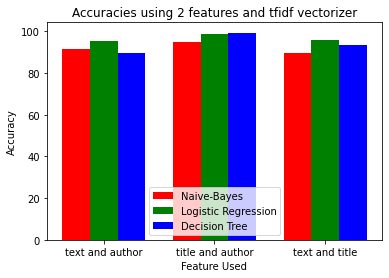

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
  
N = 3
ind = np.arange(N) 
width = 0.25
  
xvals = [tf_acc[0], tf_acc[3], tf_acc[6]]
yvals = [tf_acc[1], tf_acc[4], tf_acc[7]]
zvals = [tf_acc[2], tf_acc[5], tf_acc[8]]

for i in range(len(xvals)):
  xvals[i]*=100

for i in range(len(yvals)):
  yvals[i]*=100

for i in range(len(zvals)):
  zvals[i]*=100

bar1 = plt.bar(ind, xvals, width, color = 'r')
bar2 = plt.bar(ind+width, yvals, width, color='g')
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Feature Used")
plt.ylabel('Accuracy')
plt.title("Accuracies using 2 features and tfidf vectorizer")
  
plt.xticks(ind+width,['text and author', 'title and author', 'text and title'])
plt.legend( (bar1, bar2, bar3), ('Naive-Bayes', 'Logistic Regression', 'Decision Tree') )
plt.show()

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
fake_news_data=fake_news_data.drop('id',axis=1)


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.2 MB/s 
     |████████████████████████████████| 59 kB 4.8 MB/s 
     |████████████████████████████████| 596 kB 68.5 MB/s 
     |████████████████████████████████| 3.3 MB 44.5 MB/s 
     |████████████████████████████████| 895 kB 67.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from transformers import BertModel,BertTokenizer
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
class FakeNews(torch.nn.Module):
    def __init__(self, pretrain_model):
        super(FakeNews, self).__init__()
        self.bert = BertModel.from_pretrained(pretrain_model)
        self.lstm = torch.nn.Linear(self.bert.config.hidden_size, 3)
        

    def forward(self, ids, aspect, masks):
        bert_outputs,_ = self.bert(input_ids=ids, attention_mask=masks, return_dict = False)
        lstm_outputs= self.lstm(bert_outputs)
        # lstm_outputs,_= self.lstm(bert_outputs)
        if aspect is not None:
            asp, lstm_outputs = aspect.view(-1), lstm_outputs.view(-1,3)
            loss = torch.nn.CrossEntropyLoss()(lstm_outputs, asp)
            return loss
        else:
            return lstm_outputs

In [ ]:
df=fake_news_data

In [ ]:
df.head(10)

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [ ]:
fake=df[df['label']==1]
original=df[df['label']==0]

In [ ]:
df['title'] = df['title'].fillna(" ") 
df['author'] = df['author'].fillna(" ")
df['text'] = df['text'].fillna(" ")

In [ ]:
df['fake_news_data'] = df['title'] + " " + df['author'] + " " + df['text']

In [ ]:
df=df.drop(['title','author','text'],axis=1)

In [ ]:
df.head(10)

,label,fake_news_data
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...
5,0,Jackie Mason: Hollywood Would Love Trump if He...
6,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...
7,0,Benoît Hamon Wins French Socialist Party’s Pre...
8,0,Excerpts From a Draft Script for Donald Trump’...
9,0,"A Back-Channel Plan for Ukraine and Russia, Co..."


In [ ]:
df.reset_index(drop=True, inplace=True)
corpus_df=pre_processing(df['fake_news_data'])

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
cvectorizer = CountVectorizer(max_features=5000)

tf_data = tfidf.fit_transform(corpus_df)
cv_data = cvectorizer.fit_transform(corpus_df)

In [ ]:
x=df['fake_news_data']
y=df['label']

In [ ]:
from sklearn.cluster import KMeans
kmeans_tf = KMeans(n_clusters=2, random_state=0).fit(tf_data)
kmeans_cv = KMeans(n_clusters=2, random_state=0).fit(cv_data)

In [ ]:
score_cv = accuracy_score(y, kmeans_cv.labels_)
confusion_cv=confusion_matrix(y, kmeans_cv.labels_)

In [ ]:
score_cv

0.40740384615384617

In [ ]:
confusion_cv

array([[ 8080,  2307],
       [10019,   394]])

In [ ]:
score_tf = accuracy_score(y, kmeans_tf.labels_)
confusion_tf=confusion_matrix(y, kmeans_tf.labels_)

In [ ]:
score_tf

0.3833173076923077

In [ ]:
confusion_tf

array([[ 7938,  2449],
       [10378,    35]])

(20800, 5000)

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
def pre_process(msg) :
  corpus_test = {}
  for i in range(len(msg)):
    review = re.sub('[^a-zA-Z]',' ',msg[i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in cache]

    for j in review:
      if(j in corpus_test):
        corpus_test[j]+=1
      else:
        corpus_test[j]=1
      
  return corpus_test